In [1]:
print ("ಓಂ ಗಣೇಶಾಯ ನಮಃ")

ಓಂ ಗಣೇಶಾಯ ನಮಃ


#  <span style='color:brown'> 1. Import all necessary libraries and read the CSV file(Dataset) 

In [2]:
import warnings
warnings.filterwarnings('ignore')

#data wrangling & processing
import pandas as pd
import numpy as np


#data plotting & visualization
import seaborn as sns                       
import matplotlib # for Visualisations    
import matplotlib.pyplot as plt
%matplotlib inline     


from scipy import stats

In [3]:
cvd = pd.read_csv("Data/CVD.csv")

In [4]:
cvd.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#  <span style='color:brown'>  #   <span style='color:brown'> 2. EDA (Exploratory Data Analysis)

<span style='color:indigo'> ***As a initial step, first let us understand the given dataset and meaning of variables*** </span>


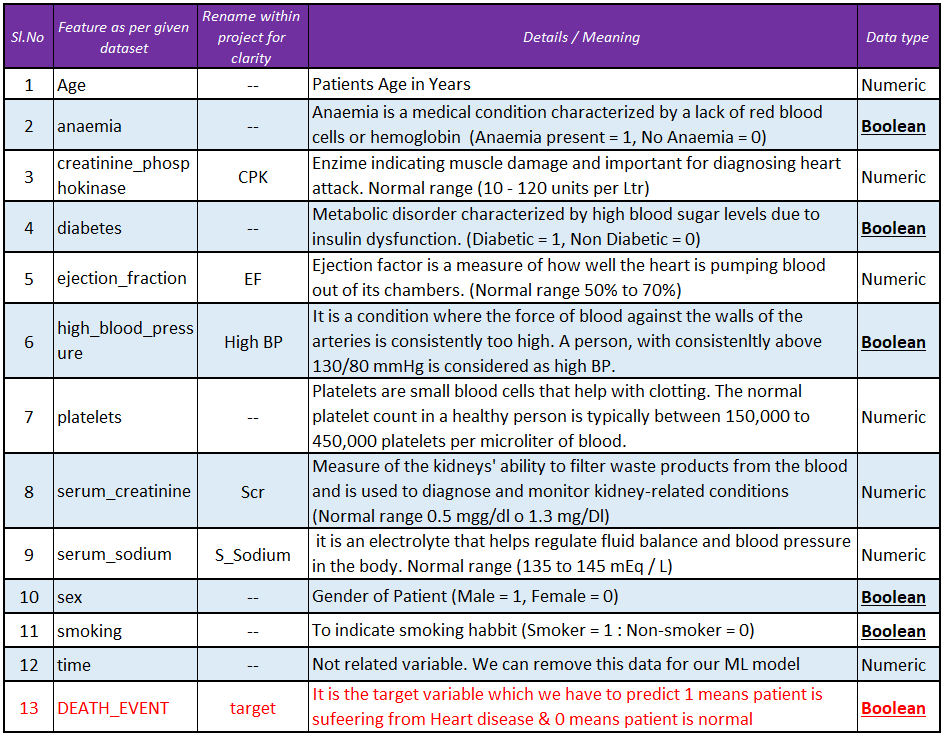

<span style='color:indigo'> ***Rename the dataset column names*** </span>

In [5]:
##For better understanding, we shall rename the data set contents to meaningful names. This will help us to visualize graphs
##and furhter processing of the variable names where-ever needed ##

cvd = cvd.rename(columns = {"creatinine_phosphokinase" : "CPK", "ejection_fraction" : "EF", "high_blood_pressure" : "High BP", 
                      "serum_creatinine": "Scr","serum_sodium" : "S_Sodium", "DEATH_EVENT": "target" })

In [6]:
cvd.head(3) # Check for the revised or modified variable names in the dataset

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,sex,smoking,time,target
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


<span style='color:indigo'> ***As a next step, in the given dataset, TIME column is not giving us any information. Hence, we can delete this column*** </span>

In [7]:
#Removing the time column from dataset using drop command#

cvd = cvd.drop(columns = ['time'])

<span style='color:indigo'> ***As a next step, in the given dataset, CPK value is given in 3 digits. Where as standard CPK value is 10 to 120 micrograms per liter(mcg/L). Hence, we divide this by fixed value 10 and store the data back to dataframe. This will make sure, we are using standard unit of CPK in our project*** </span>

In [8]:
cvd['CPK'] = cvd['CPK']/10
print(cvd)

      age  anaemia    CPK  diabetes  EF  High BP  platelets  Scr  S_Sodium  \
0    75.0        0   58.2         0  20        1  265000.00  1.9       130   
1    55.0        0  786.1         0  38        0  263358.03  1.1       136   
2    65.0        0   14.6         0  20        0  162000.00  1.3       129   
3    50.0        1   11.1         0  20        0  210000.00  1.9       137   
4    65.0        1   16.0         1  20        0  327000.00  2.7       116   
..    ...      ...    ...       ...  ..      ...        ...  ...       ...   
294  62.0        0    6.1         1  38        1  155000.00  1.1       143   
295  55.0        0  182.0         0  38        0  270000.00  1.2       139   
296  45.0        0  206.0         1  60        0  742000.00  0.8       138   
297  45.0        0  241.3         0  38        0  140000.00  1.4       140   
298  50.0        0   19.6         0  45        0  395000.00  1.6       136   

     sex  smoking  target  
0      1        0       1  
1      

<span style='color:indigo'>***For better understanding, we rename contents of dataset to meaning ful names instead of 1 & 0 for variable SEX***</span>

In [9]:
#Use Lambda python function and assign if column has value=1 (Male) or else Value=0 (Female)
 
cvd['sex'] = cvd.sex.apply(lambda x:'male' if x==1 else 'female')

cvd.head(3)          #Verify the previous steps by checking column "sex" & verify the removal of column "time"


,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,sex,smoking,target
0,75.0,0,58.2,0,20,1,265000.00,1.9,130,male,0,1
1,55.0,0,786.1,0,38,0,263358.03,1.1,136,male,0,1
2,65.0,0,14.6,0,20,0,162000.00,1.3,129,male,1,1


In [10]:
cvd.tail(3)

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,sex,smoking,target
296,45.0,0,206.0,1,60,0,742000.0,0.8,138,female,0,0
297,45.0,0,241.3,0,38,0,140000.0,1.4,140,male,1,0
298,50.0,0,19.6,0,45,0,395000.0,1.6,136,male,1,0


<span style='color:indigo'>***Find shape of our dataset (Rows & Columns) + find the data types + Check for Null values / Float values and resolve where ever needed***

In [11]:
cvd.shape


(299, 12)

In [12]:
print ("Number of Rows", cvd.shape[0])
print ("Number of Columns", cvd.shape[1])

Number of Rows 299
Number of Columns 12


<span style='color:indigo'>***Check Null values in the dataset + Get overall statistics about dataset***

In [13]:
cvd.isnull().sum()

age          0
anaemia      0
CPK          0
diabetes     0
EF           0
High BP      0
platelets    0
Scr          0
S_Sodium     0
sex          0
smoking      0
target       0
dtype: int64

In [14]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        299 non-null    float64
 1   anaemia    299 non-null    int64  
 2   CPK        299 non-null    float64
 3   diabetes   299 non-null    int64  
 4   EF         299 non-null    int64  
 5   High BP    299 non-null    int64  
 6   platelets  299 non-null    float64
 7   Scr        299 non-null    float64
 8   S_Sodium   299 non-null    int64  
 9   sex        299 non-null    object 
 10  smoking    299 non-null    int64  
 11  target     299 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 28.2+ KB


<span style='color:indigo'>***This shows, there are 2 Float values at several column which is not really required***

In [15]:
##Convert floating point values to Integer for variables "age" & "platelets" for further clarity & store it in same DataFrame
##Then verify the datatypes, so that Age & Platelets datatypes are converted to integer

cvd = cvd.astype({"age":"int", "platelets": "int"})
print(cvd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        299 non-null    int32  
 1   anaemia    299 non-null    int64  
 2   CPK        299 non-null    float64
 3   diabetes   299 non-null    int64  
 4   EF         299 non-null    int64  
 5   High BP    299 non-null    int64  
 6   platelets  299 non-null    int32  
 7   Scr        299 non-null    float64
 8   S_Sodium   299 non-null    int64  
 9   sex        299 non-null    object 
 10  smoking    299 non-null    int64  
 11  target     299 non-null    int64  
dtypes: float64(2), int32(2), int64(7), object(1)
memory usage: 25.8+ KB
None


<span style='color:indigo'> ***Measure the central tendency of the data set (Mean, Min, Max, 25%, 50%.... etc)*** </span>

In [16]:
cvd.describe()

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,smoking,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000,299.00000
mean,60.829431,0.431438,58.183946,0.418060,38.083612,0.351171,263358.026756,1.39388,136.625418,0.32107,0.32107
std,11.894997,0.496107,97.028788,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.46767,0.46767
min,40.000000,0.000000,2.300000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.00000,0.00000
25%,51.000000,0.000000,11.650000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.00000,0.00000
50%,60.000000,0.000000,25.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,0.00000,0.00000
75%,70.000000,1.000000,58.200000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.00000,1.00000
max,95.000000,1.000000,786.100000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.00000,1.00000


<span style='color:indigo'>***Find the co-relation between the data & draw seaborn heatmap*** 

In [17]:
cvd.corr()

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,smoking,target
age,1.000000,0.087574,-0.081406,-0.101454,0.060195,0.093170,-0.052475,0.159237,-0.045912,0.018926,0.253581
anaemia,0.087574,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.107290,0.066270
CPK,-0.081406,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.002421,0.062728
diabetes,-0.101454,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.147173,-0.001943
EF,0.060195,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.067315,-0.268603
High BP,0.093170,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.055711,0.079351
platelets,-0.052475,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,0.028234,-0.049139
Scr,0.159237,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,-0.027414,0.294278
S_Sodium,-0.045912,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,0.004813,-0.195204
smoking,0.018926,-0.107290,0.002421,-0.147173,-0.067315,-0.055711,0.028234,-0.027414,0.004813,1.000000,-0.012623


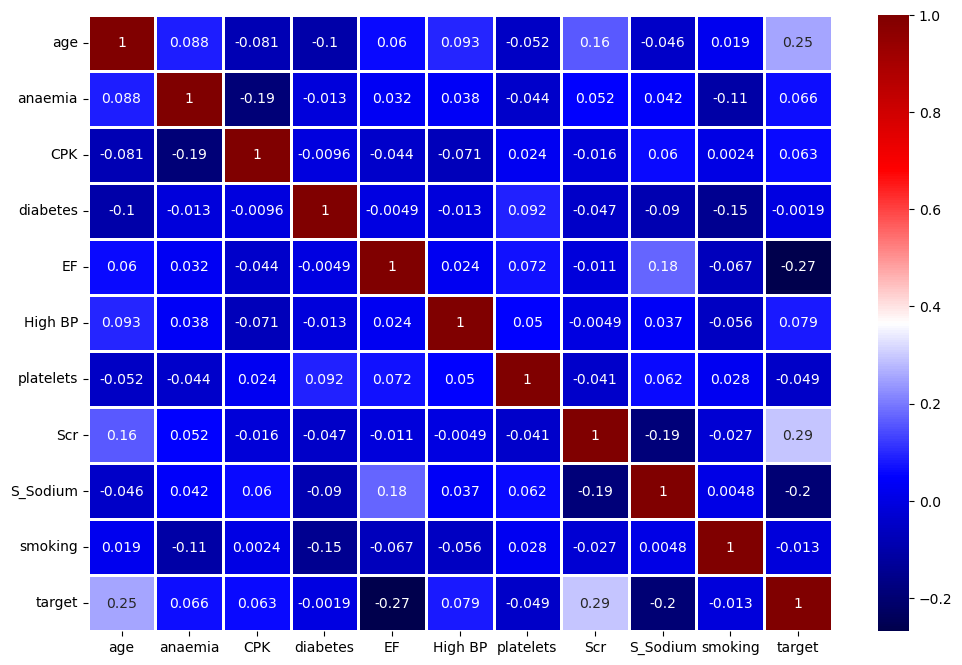

In [18]:
##Heatmap to find the co-relation
plt.figure(figsize = (12,8))
sns.heatmap(cvd.corr(), linewidth = 1, annot = True, cmap = "seismic")
plt.show()

<span style='color:indigo'>***According to dataset, how many people have Heart disease(target = 1 & how many people are Normal(target = 0) , show it in graph***

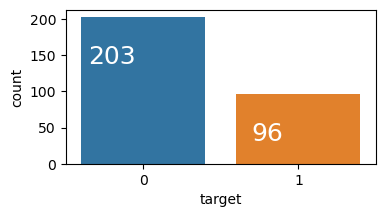

,target
0,203
1,96


In [19]:
plt.figure(figsize = (4,2))

ax=sns.countplot(x=cvd['target'], data=cvd);

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

cvd['target'].value_counts().to_frame()

- <span style='color:indigo'> The ratio of the people who are with Heart disease are more comparitively to the people who have less chance of getting it (203 = Heart attack / 93 = No-risk)

- Heart disease -> Blue
- Normal -> Orange
- Conclusion: In this dataset, the ratio of the people who already got heart attack is more comparatively to the ople who have less chance of getting it.

<span style='color:indigo'>***As a first step, we can visualize the Histogram to understand our data. about each parameter and mejority of values of dataset. Example,   
    - this in this dataset, 55 years to 65 years patients are more  
    - with in this dataset, S_Sodium value of most of the people is between the range 132 to 142***

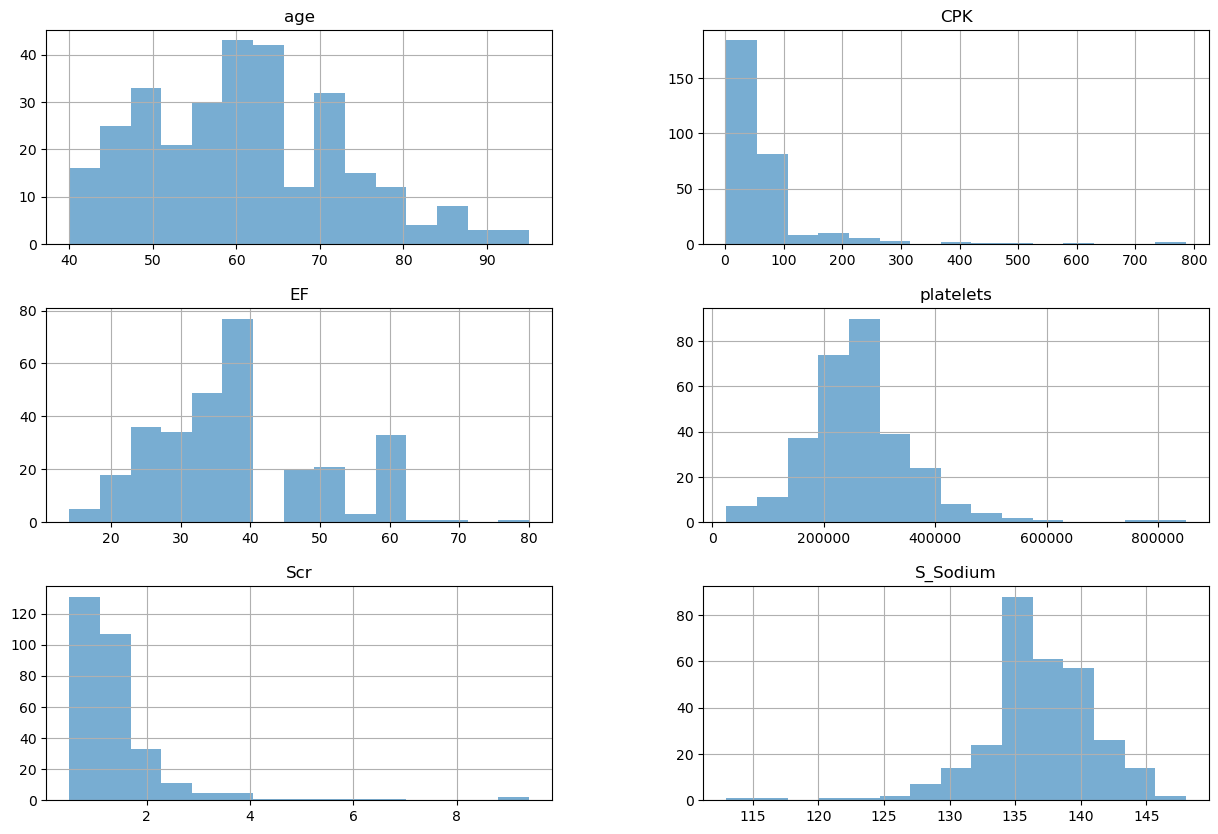

In [20]:
cvd[['age', 'CPK', 'EF', 'platelets', 'Scr', 'S_Sodium']]. hist(bins=15, figsize=(15,10), alpha=0.6, grid=True)
plt.show()

<span style='color:indigo'>***As a next step, we can see the subplots and also we can see the data skewness***                         - (Positive skew, Negetive skew or Symmetrical distribution of data)  
    - To achive this, we are going to histplot from seaborn library   
    - Along with this, we also see data distribution and have a look into where most of the data value fits, and see outliers on each numerical data

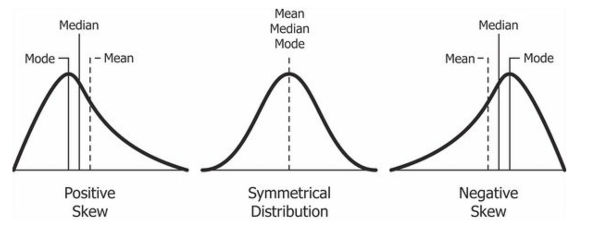

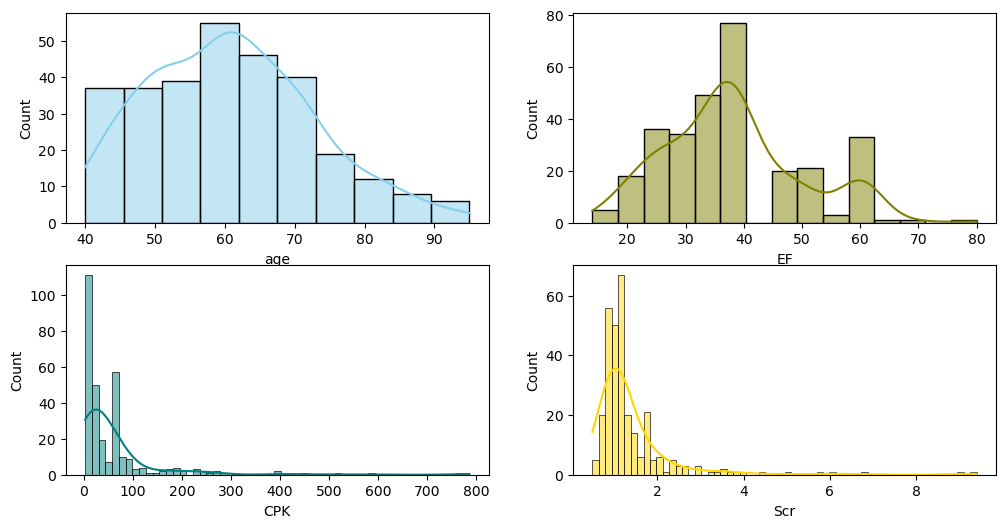

In [21]:
#data shown using Histplot seaborn functionality. Data shown here are Age, EF, CPK, SCR
fig, axs = plt.subplots(2, 2, figsize=(12,6))
sns.histplot(data=cvd, x='age', kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=cvd, x='EF', kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=cvd, x='CPK', kde=True, color="teal", ax=axs[1,0])
sns.histplot(data=cvd, x='Scr', kde=True, color="gold", ax=axs[1,1])
plt.show()

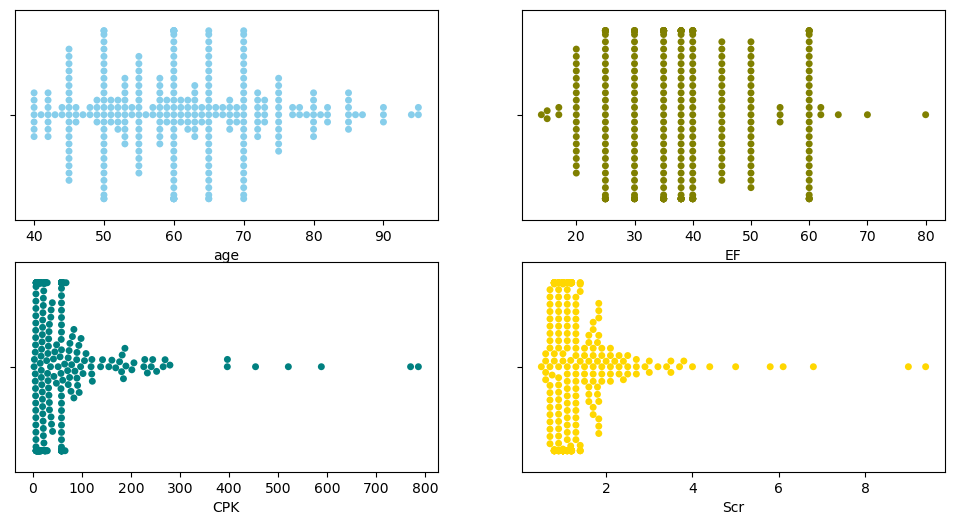

In [22]:
#data shown using Histplot swarmplot functionality. Data shown here are Age, EF, CPK, SCR
fig, axs = plt.subplots(2, 2, figsize=(12,6))
sns.swarmplot(data=cvd, x='age', color="skyblue", ax=axs[0,0])
sns.swarmplot(data=cvd, x='EF', color="olive", ax=axs[0,1])
sns.swarmplot(data=cvd, x='CPK', color="teal", ax=axs[1,0])
sns.swarmplot(data=cvd, x='Scr', color="gold", ax=axs[1,1])
plt.show()

<span style='color:indigo'> ***By looking into above graphs, we can understand***    
<span style='color:indigo'>- Age: we have more people between age group 50 to 70 in our dataset (Symmetrical skew)      
<span style='color:indigo'>- EF: 25 to 40 is the value of EF most of the patients in our dataset (Symmetrical skew)  
<span style='color:indigo'>- CPK: most of the patients CPK level in our dtaset is between 5.0 to 100.0 (Normal value 10 -120) & (left skew)  
<span style='color:indigo'>- SCR: most of the patients SCR level is 0 - 1.5. (left skew) </span> 
    
<span style='color:red'> ***Other important thing, outliers are present all the 4 variables***

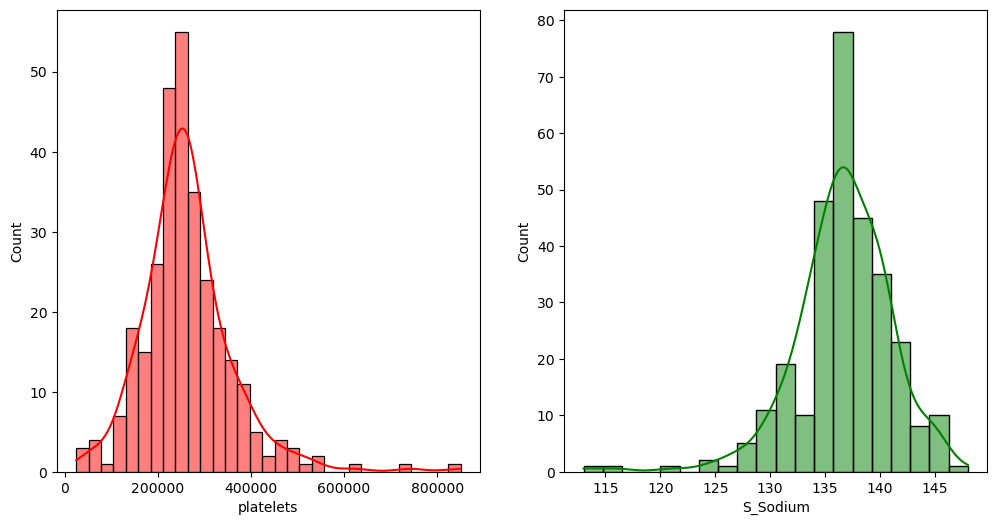

In [23]:
#data shown using seaborn histplot functionality. Data shown here are platelets & S_Sodium

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=cvd, x='platelets', kde=True, color="red", ax=axs[0])
sns.histplot(data=cvd, x='S_Sodium', kde=True, color="green", ax=axs[1])

plt.show()

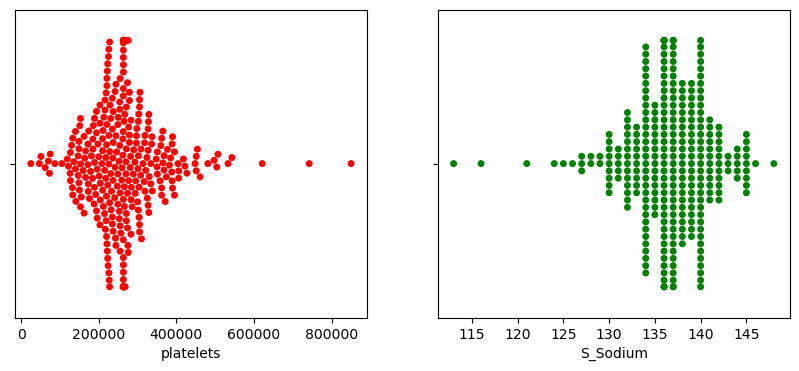

In [24]:
#data shown using seaborn swarmplot functionality. Data shown here are platelets & S_Sodium
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.swarmplot(data=cvd, x='platelets',color="red", ax=axs[0])
sns.swarmplot(data=cvd, x='S_Sodium',color="green", ax=axs[1])
plt.show()

<span style='color:indigo'> ***By looking into above graphs, we can understand***    
<span style='color:indigo'>- Platelets: Most of the data is between 140000 to 400000 (left skew)      
<span style='color:indigo'>- S_Sodium: Most of the data is between 130 to 140 (Right skew)  
    
<span style='color:red'> ***Other important thing, outliers are present in both variables***

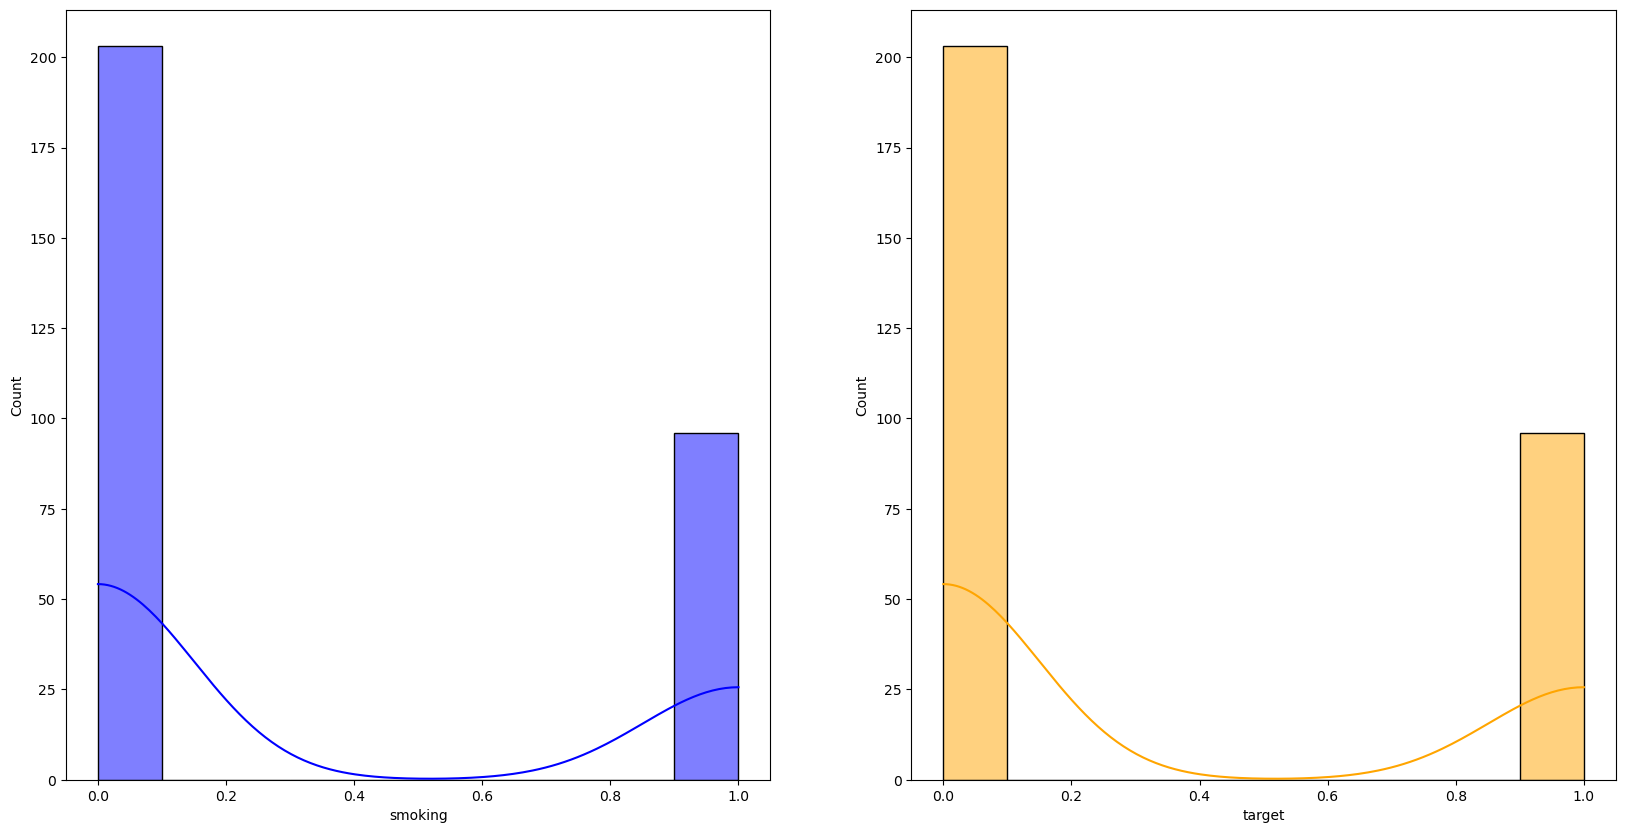

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(data=cvd, x='smoking', kde=True, color="blue", ax=axs[0])
sns.histplot(data=cvd, x='target', kde=True, color="orange", ax=axs[1])
plt.show()

<span style='color:indigo'>***Creating separate data frames for normal & Heart disease patients to establish co-relation between different parameters***


In [27]:
attr_1 = cvd[cvd['target'] == 1]   #attr_1 is a new variable, which will be true when Target = 1


attr_0 = cvd[cvd['target'] == 0]   #attr_0 is a new variable, which will be true when Target = 0

In [28]:
attr_1.head(3) # This will list out the dataset when target value is 1 (Patient who has Heart disease)

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,sex,smoking,target
0,75,0,58.2,0,20,1,265000,1.9,130,male,0,1
1,55,0,786.1,0,38,0,263358,1.1,136,male,0,1
2,65,0,14.6,0,20,0,162000,1.3,129,male,1,1


In [29]:
attr_0.head(3) # This will list out the dataset when target value is 0 (Patient who are normal)

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,sex,smoking,target
14,49,1,8.0,0,30,1,427000,1.0,138,female,0,0
20,65,1,5.2,0,25,1,276000,1.3,137,female,0,0
23,53,0,6.3,1,60,0,368000,0.8,135,male,0,0


<span style='color:indigo'>***We can comapre age with few input parameters to check relation***

<span style='color:indigo'>***In below plots, it shows two things***   
    -histogram of patients "age" with heart disease and without heart disease (normal)  
    -second one shows Gender distribution graph of Male and Female with heart disease and normal

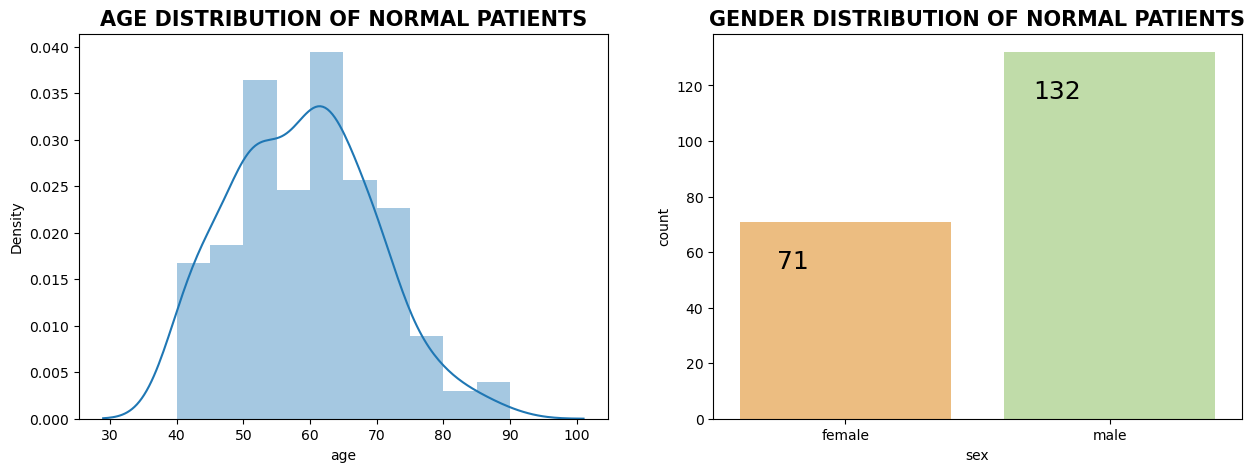

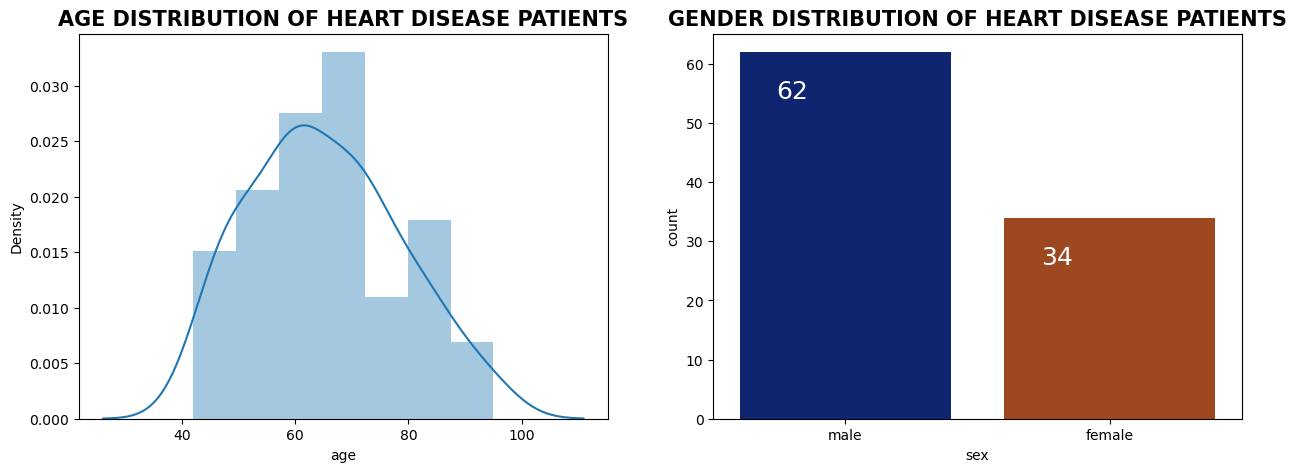

In [30]:

#Plotting normal patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='Spectral')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize = 15, weight='bold')

#This below code is to show the numbers on the graph
for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='black', size=18)

plt.show()



#Plotting heart disease (CVD) patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize = 15, weight='bold')

#This below code is to show the numbers on the graph
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='dark')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize = 15, weight='bold')

for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='white', size=18)
    
plt.show()

<span style='color:indigo'>***As per the dataset, these plots shows 2 things***  
<span style='color:indigo'>- Most of the normal patients(Without Heart disease) are Male compare to females  
<span style='color:indigo'>- Male have more heart disease couunts compare to female  

<span style='color:indigo'>***In below plots, it shows relation between "Heart disease"  and "anaemia"***   

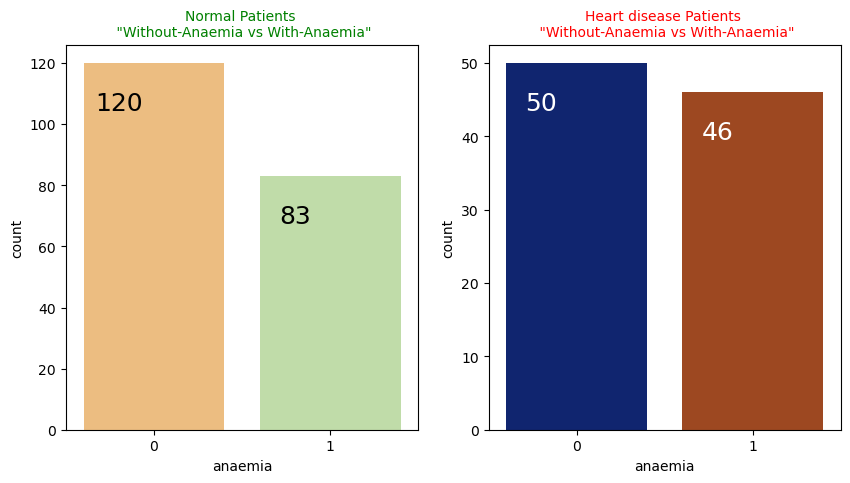

In [31]:
#plotting normal patients
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['anaemia'], palette = 'Spectral')
plt.title('Normal Patients \n "Without-Anaemia vs With-Anaemia"', fontsize=10, color="green")

for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='black', size=18)

#plotting Heart disease patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['anaemia'], palette = 'dark')
plt.title('Heart disease Patients \n "Without-Anaemia vs With-Anaemia"', fontsize=10, color="red")

for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

<span style='color:indigo'>***In below plots, it shows relation between "Heart disease" and "High blood pressure"***   

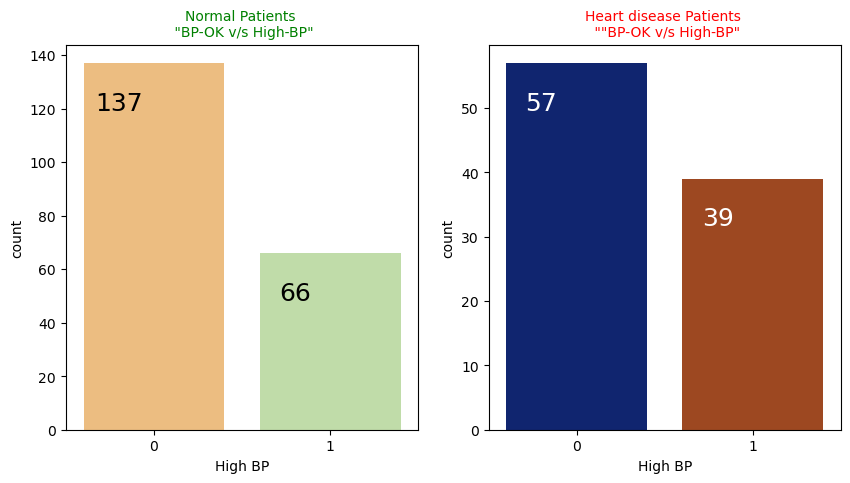

In [32]:
#plotting normal patients
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['High BP'], palette = 'Spectral')
plt.title('Normal Patients \n "BP-OK v/s High-BP"', fontsize=10, color="green")

for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='black', size=18)

#plotting Heart disease patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['High BP'], palette = 'dark')
plt.title('Heart disease Patients \n ""BP-OK v/s High-BP"', fontsize=10, color="red")

for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

<span style='color:indigo'>***In below plots, it shows relation between "Heart disease" and "smoking habits" of patients***   

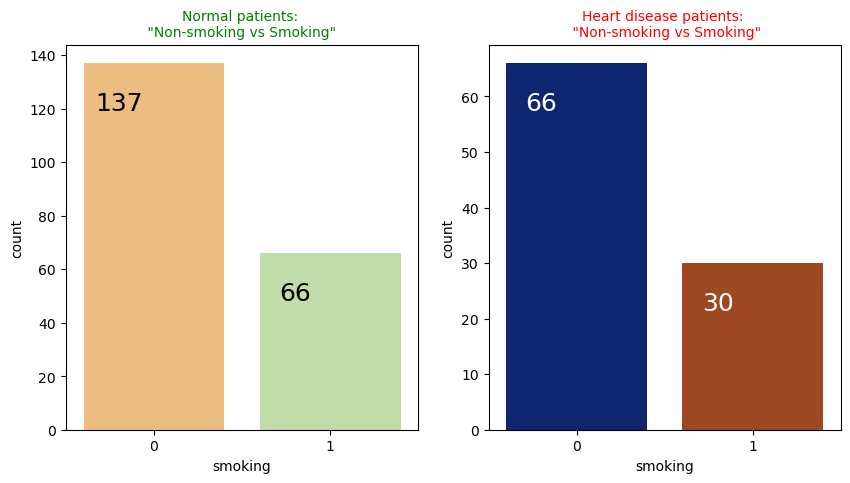

In [33]:
#plotting normal patients
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['smoking'], palette = 'Spectral')
plt.title('Normal patients: \n "Non-smoking vs Smoking" ', fontsize=10, color="green")

for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='black', size=18)

#plotting Heart disease patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['smoking'], palette = 'dark')
plt.title('Heart disease patients: \n "Non-smoking vs Smoking"', fontsize=10, color="red")

for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

<span style='color:indigo'>***In below plots, it shows relation between "Heart disease" and "diabeties"***   

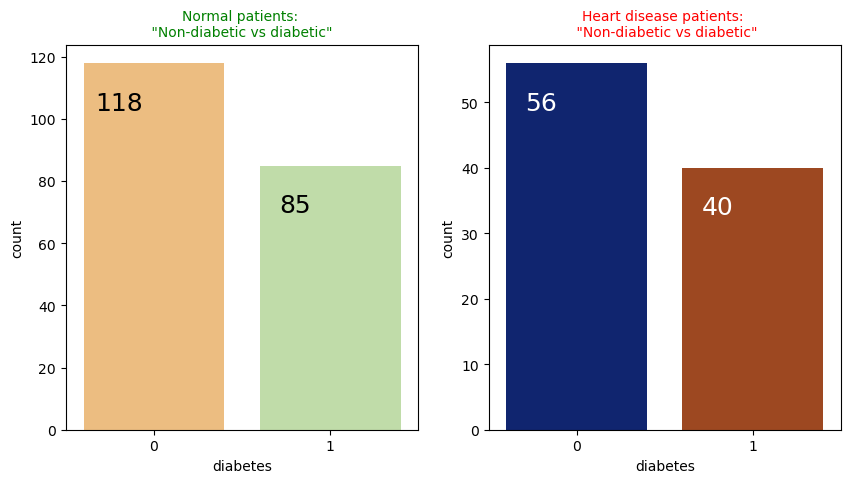

In [34]:
#plotting normal patients
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['diabetes'], palette = 'Spectral')
plt.title('Normal patients: \n "Non-diabetic vs diabetic" ', fontsize=10, color="green")

for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='black', size=18)

#plotting Heart disease patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['diabetes'], palette = 'dark')
plt.title('Heart disease patients: \n "Non-diabetic vs diabetic"', fontsize=10, color="red")

for a in ax1.patches:
    ax1.annotate(f'\n{a.get_height()}', (a.get_x()+0.2, a.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [35]:
cvd.head(2)

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,sex,smoking,target
0,75,0,58.2,0,20,1,265000,1.9,130,male,0,1
1,55,0,786.1,0,38,0,263358,1.1,136,male,0,1


<span style='color:indigo'>***We can use pairplot to see the relation between target and few other variables***   

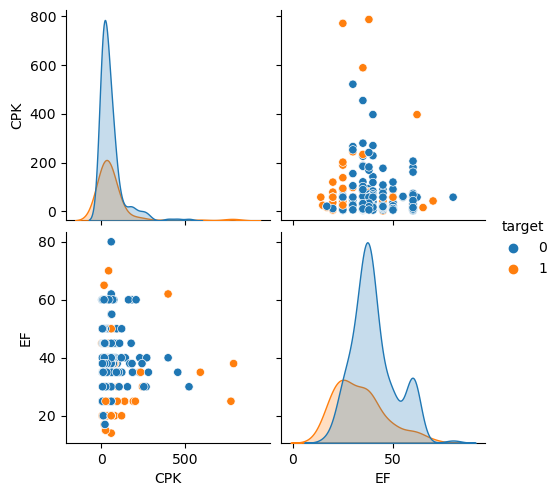

In [36]:
#This below pairplots show us the relation of CPK and EF with target
sns.pairplot(cvd, hue='target', vars = ['CPK', 'EF' ])
plt.show()

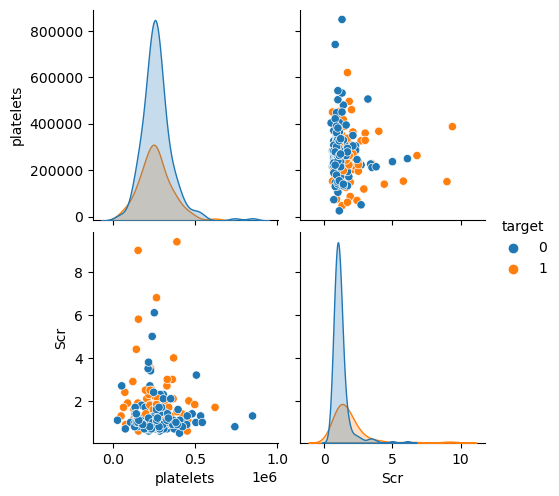

In [37]:
#This below pairplots show us the relation of platelets and Scr with target
sns.pairplot(cvd, hue='target', vars = ['platelets', 'Scr'])
plt.show()

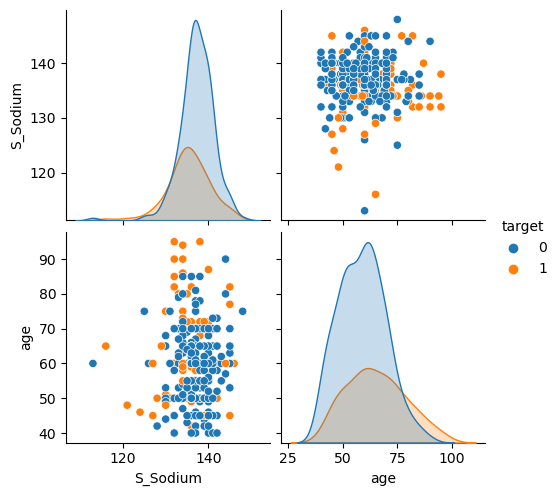

In [38]:
#This below pairplots show us the relation of S_Sodium and age with target
sns.pairplot(cvd, hue='target', vars = ['S_Sodium', 'age'])
plt.show()

<span style='color:indigo'>***All the above plots and graphs show us some relation between variables and also it mentions about outliers which exists in the given dataset***   

<span style='color:indigo'>***Scatter plots are mentioned below and this clearly inform us about outliers present in different variables***   

<AxesSubplot:xlabel='CPK', ylabel='EF'>

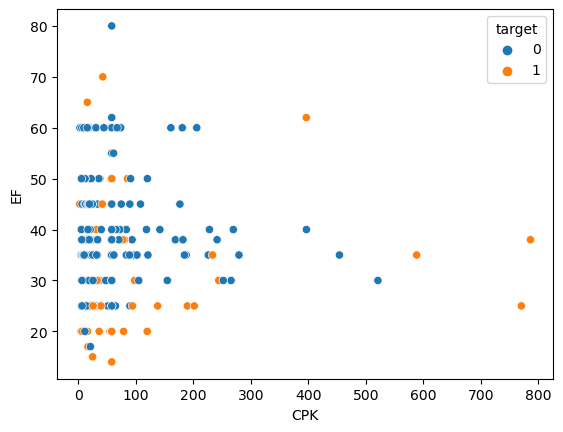

In [39]:
sns.scatterplot(x = 'CPK', y = 'EF', hue = 'target', data = cvd )

<span style='color:indigo'>***Scatter plots are mentioned below and this clearly inform us about outliers present in different variables***   

<AxesSubplot:xlabel='platelets', ylabel='S_Sodium'>

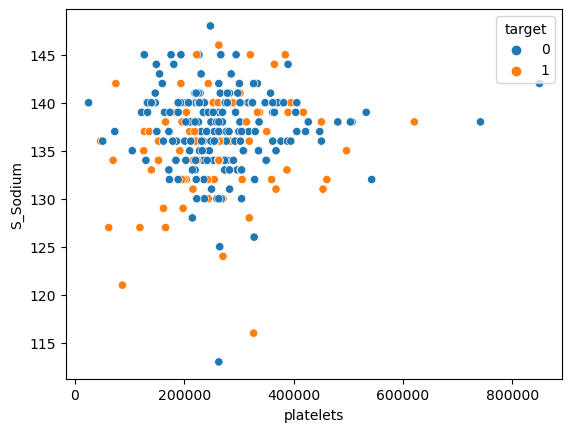

In [40]:
sns.scatterplot(x = 'platelets', y = 'S_Sodium', hue = 'target', data = cvd )

<span style='color:indigo'>***In above mentioned scatterplots, we can see some relation between variables and also outliers are clearly visible***   

<span style='color:red'>***#Outliner Detection and Removal***

<span style='color:indigo'>An Outlier is an extremely large or extremely small datavalue relative to the rest of the datset. It may represent a data entry error, or it may be genuine data.







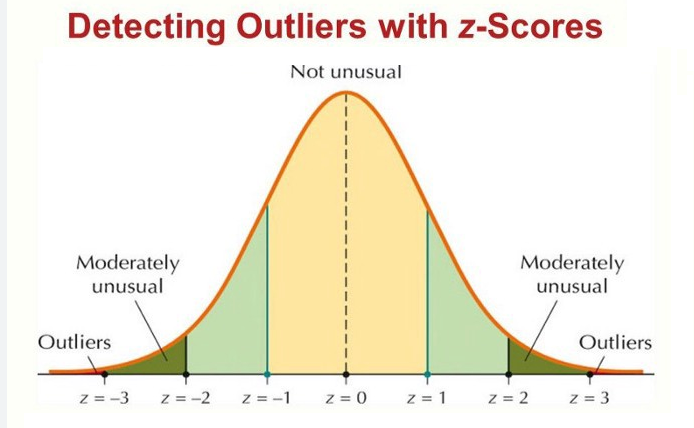


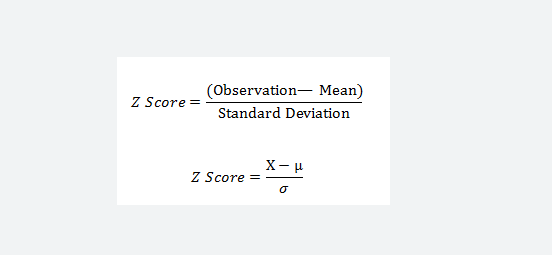

In [41]:
#Create a new dataframe for all numerical (Non-boolean) variables from our dataset

cvd_numeric = cvd[['age', 'CPK', 'EF', 'platelets', 'Scr', 'S_Sodium']]

In [42]:
cvd_numeric.head(5)

,age,CPK,EF,platelets,Scr,S_Sodium
0,75,58.2,20,265000,1.9,130
1,55,786.1,38,263358,1.1,136
2,65,14.6,20,162000,1.3,129
3,50,11.1,20,210000,1.9,137
4,65,16.0,20,327000,2.7,116


<span style='color:red'>***By using Z-Score method, we are going to remove outliers in the data set. Below mentioned code will help us achieve this thing***

In [43]:
# calculating the z-score of numeric columns in the dataset
# Note : Make sure to import Scipy as we are using this library to find z-score

z = np.abs(stats.zscore(cvd_numeric))
print(z)

          age       CPK        EF     platelets       Scr  S_Sodium
0    1.193302  0.000166  1.530560  1.681651e-02  0.490057  1.504036
1    0.490896  7.514640  0.007077  2.740240e-07  0.284552  0.141976
2    0.351203  0.449939  1.530560  1.038073e+00  0.090900  1.731046
3    0.911945  0.486071  1.530560  5.464741e-01  0.490057  0.085034
4    0.351203  0.435486  1.530560  6.517986e-01  1.264666  4.682176
..        ...       ...       ...           ...       ...       ...
294  0.098573  0.537688  0.007077  1.109765e+00  0.284552  1.447094
295  0.490896  1.278215  0.007077  6.802474e-02  0.187726  0.539054
296  1.332995  1.525979  1.854958  4.902082e+00  0.575031  0.312044
297  1.332995  1.890398  0.007077  1.263389e+00  0.005926  0.766064
298  0.911945  0.398321  0.585389  1.348231e+00  0.199578  0.141976

[299 rows x 6 columns]


In [44]:
#Defining threshold for filtering outliers
threshold = 3
print(np.where(z > 3))

(array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296], dtype=int64), array([1, 5, 4, 5, 4, 1, 4, 1, 2, 1, 1, 3, 3, 4, 1, 1, 5, 4, 4, 3],
      dtype=int64))


<span style='color:red'> ***      / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / /    ***

<span style='color:indigo'> ***In the above result, please note these things***
<span style='color:indigo'>- First array give us information us the Row number 
<span style='color:indigo'>- Second array give us information about column number
<span style='color:indigo'>- Two example to give clarity on this. 
<span style='color:indigo'>-  when we observe the first one of each array, it is mentioned as 1 & 1.
<span style='color:indigo'>****When we look into data set as mentioned below, 01 row & 01 column indicates CPK = 786.1 (which is unusual) - Normal value is 10 to 120 (mcg/L)****

<span style='color:indigo'>-  when we observe the 4th one of each array, it is mentioned as 19 & 5.
****When we look into data set as mentioned below, 19 row & 5 column indicates S.Sodium = 121 (which is unusual) - Normal value is 135 to 145 (mcg/L)****

<span style='color:indigo'>-  when we observe the 6th one of each array, it is mentioned as 52 & 1.
****When we look into data set as mentioned below, 52 row & 1 column indicates CPK = 396.4 (which is unusual) - Normal value is 10 to 120 (mcg/L)****

<span style='color:indigo'>- In total, we have 20 Z score parameters or outliers in our given data set.
    
<span style='color:red'> ***      / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / / /    ***

In [45]:
cvd_numeric.head(53)

,age,CPK,EF,platelets,Scr,S_Sodium
0,75,58.2,20,265000,1.90,130
1,55,786.1,38,263358,1.10,136
2,65,14.6,20,162000,1.30,129
3,50,11.1,20,210000,1.90,137
4,65,16.0,20,327000,2.70,116
5,90,4.7,40,204000,2.10,132
6,75,24.6,15,127000,1.20,137
7,60,31.5,60,454000,1.10,131
8,65,15.7,65,263358,1.50,138
9,80,12.3,35,388000,9.40,133


In [46]:
#Filtering outliers & retain only data points which are below threshold
#Before removing outliers, this is the shape of data we have (299 rows & 6 columns)
cvd_numeric.shape

(299, 6)

<span style='color:indigo'> ***new dataframe "cvd1" shall be created to store the new dataframe after removing outliers from the original data set***

In [47]:
cvd1 = cvd[(z < 3).all(axis=1)]

In [48]:
cvd1.shape

(280, 12)

<span style='color:indigo'> ***new dataframe "cvd1" contains only 280 rows after removing the outliers***

In [49]:
#verify the cvd_numeric dataframe
cvd_numeric.head(3)

,age,CPK,EF,platelets,Scr,S_Sodium
0,75,58.2,20,265000,1.9,130
1,55,786.1,38,263358,1.1,136
2,65,14.6,20,162000,1.3,129


In [50]:
#verify the cvd_1 dataframe, in which outliers are removed. If you see below, after sl.no 3, 4 is not there as it has been 
#removed due to outlier present in row 4
cvd1.head(5)

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,sex,smoking,target
0,75,0,58.2,0,20,1,265000,1.9,130,male,0,1
2,65,0,14.6,0,20,0,162000,1.3,129,male,1,1
3,50,1,11.1,0,20,0,210000,1.9,137,male,0,1
5,90,1,4.7,0,40,1,204000,2.1,132,male,1,1
6,75,1,24.6,0,15,0,127000,1.2,137,male,0,1


In [51]:
cvd1.shape

(280, 12)

<span style='color:red'>Conclusion: - Now, we have removed 20 outliers which were in our record    
<span style='color:red'>-   Earlier our data set had (299 rows, 6 columns)    
<span style='color:red'>-   After removing outliers we have (280 rows, 6 columns)

In [52]:
cvd1.head(55)

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,sex,smoking,target
0,75,0,58.2,0,20,1,265000,1.90,130,male,0,1
2,65,0,14.6,0,20,0,162000,1.30,129,male,1,1
3,50,1,11.1,0,20,0,210000,1.90,137,male,0,1
5,90,1,4.7,0,40,1,204000,2.10,132,male,1,1
6,75,1,24.6,0,15,0,127000,1.20,137,male,0,1
7,60,1,31.5,1,60,0,454000,1.10,131,male,1,1
8,65,0,15.7,0,65,0,263358,1.50,138,female,0,1
10,75,1,8.1,0,38,1,368000,4.00,131,male,1,1
11,62,0,23.1,0,25,1,253000,0.90,140,male,1,1
12,45,1,98.1,0,30,0,136000,1.10,137,male,0,1


In [53]:
#Segregating datsset into features . Means X and target variables i.e., y
X = cvd1.drop(['target'], axis=1)
y = cvd1['target']

<span style='color:indigo'> ***We can again check the co-relation of all the variables against target value by using below plot. Note that, this new plot is after removing the outliers***

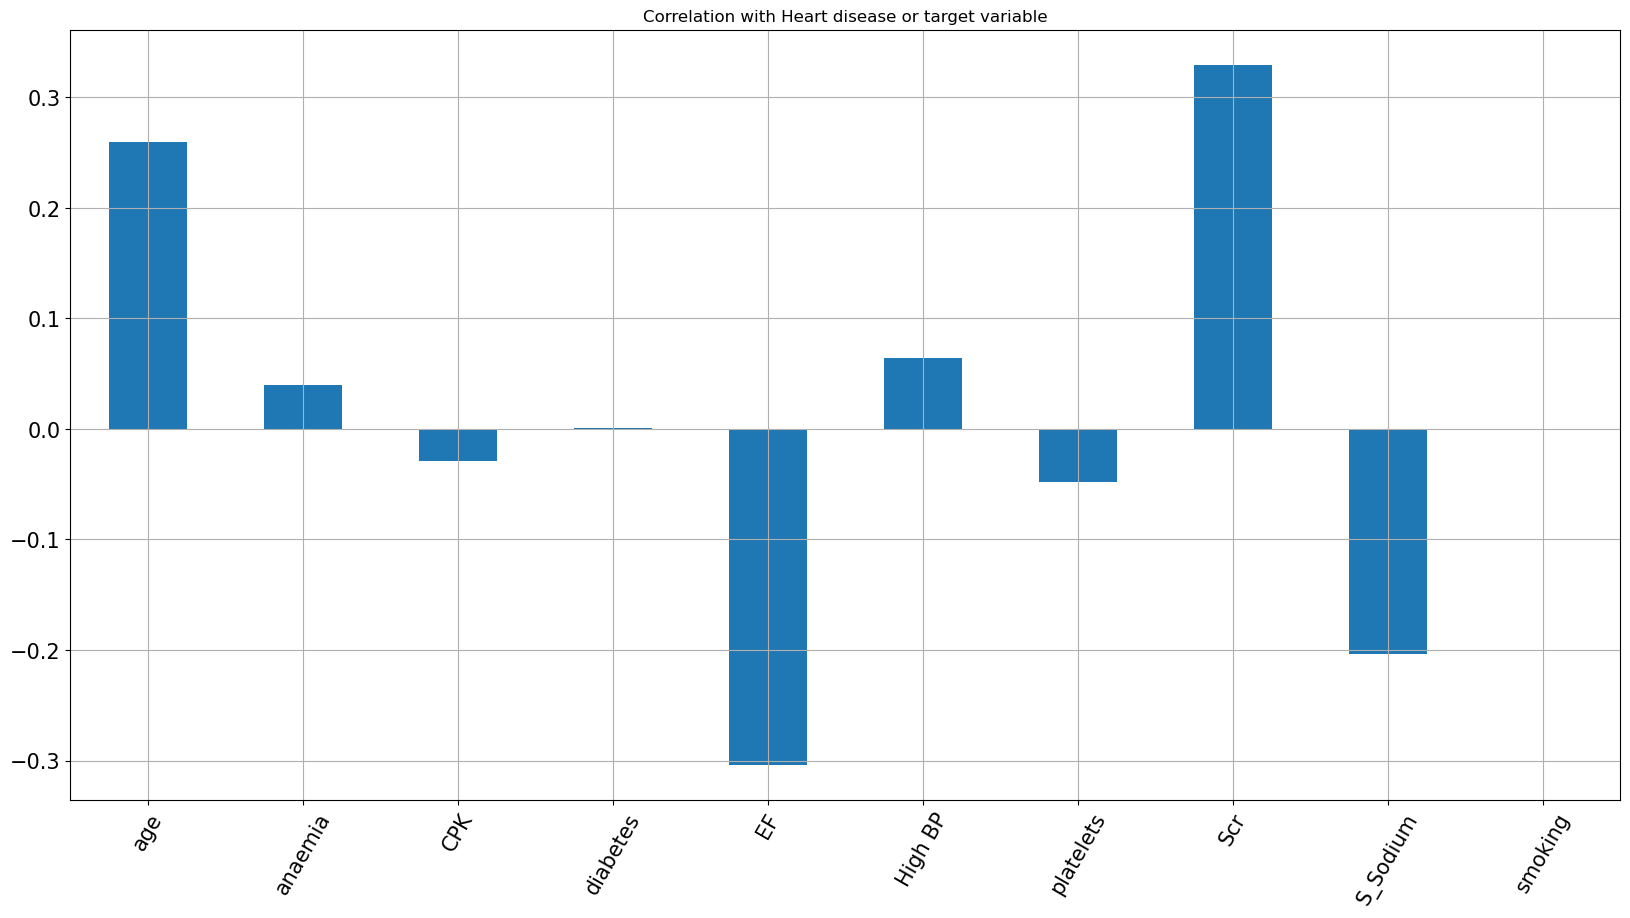

In [54]:
X.corrwith(y).plot.bar(
            figsize = (20,10), title = "Correlation with Heart disease or target variable", fontsize = 15, rot = 60, grid = True)
plt.show()

<span style='color:indigo'> ***By looking into above plot, it is clear that EF & S_Sodium are negetively co-related with target variable. Whereas, AGE & SCR is positively corelated with target variable. Here target variable is Heart disease***

<AxesSubplot:>

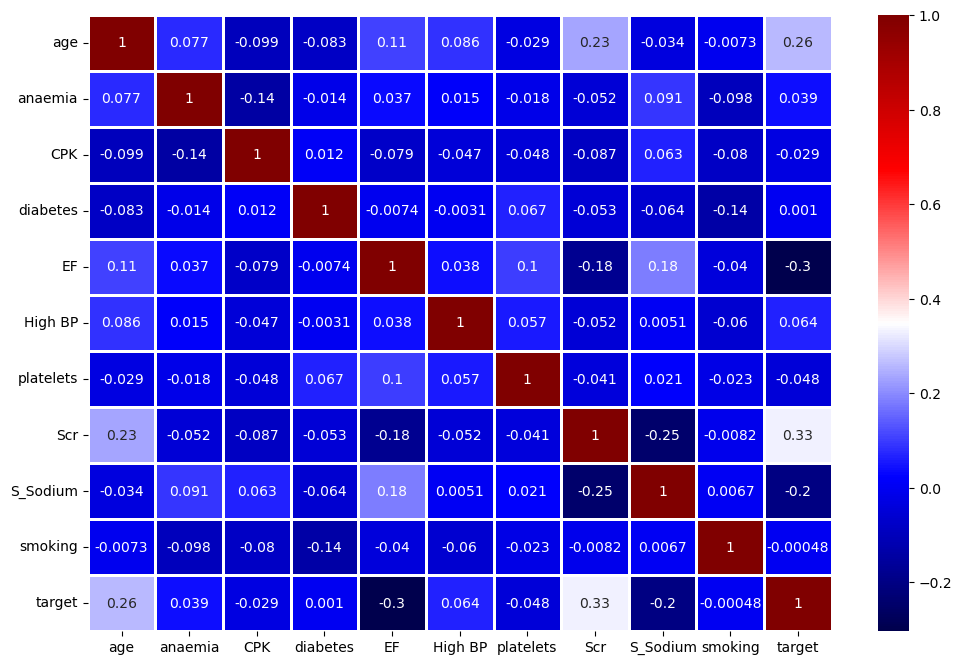

In [55]:
##Again co-relation can be seen using heatmap to cross verify
plt.figure(figsize = (12,8))
sns.heatmap(cvd1.corr(), linewidth = 1, annot = True, cmap = "seismic")

In [56]:
cvd1.corr()

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,smoking,target
age,1.000000,0.076898,-0.099022,-0.083030,0.106512,0.085913,-0.028550,0.231842,-0.033671,-0.007287,0.259125
anaemia,0.076898,1.000000,-0.144906,-0.014291,0.037141,0.014892,-0.017951,-0.051654,0.090741,-0.098411,0.039480
CPK,-0.099022,-0.144906,1.000000,0.011658,-0.078583,-0.046820,-0.047819,-0.087296,0.063430,-0.079764,-0.029289
diabetes,-0.083030,-0.014291,0.011658,1.000000,-0.007449,-0.003070,0.067170,-0.053498,-0.063822,-0.136820,0.001009
EF,0.106512,0.037141,-0.078583,-0.007449,1.000000,0.038059,0.101141,-0.177942,0.182741,-0.040007,-0.303506
High BP,0.085913,0.014892,-0.046820,-0.003070,0.038059,1.000000,0.057272,-0.051845,0.005079,-0.059963,0.064143
platelets,-0.028550,-0.017951,-0.047819,0.067170,0.101141,0.057272,1.000000,-0.041153,0.021204,-0.023075,-0.048259
Scr,0.231842,-0.051654,-0.087296,-0.053498,-0.177942,-0.051845,-0.041153,1.000000,-0.245860,-0.008193,0.329460
S_Sodium,-0.033671,0.090741,0.063430,-0.063822,0.182741,0.005079,0.021204,-0.245860,1.000000,0.006677,-0.203471
smoking,-0.007287,-0.098411,-0.079764,-0.136820,-0.040007,-0.059963,-0.023075,-0.008193,0.006677,1.000000,-0.000476


In [57]:
cvd1.describe()

,age,anaemia,CPK,diabetes,EF,High BP,platelets,Scr,S_Sodium,smoking,target
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,60.967857,0.435714,45.672500,0.417857,37.835714,0.360714,258820.064286,1.275393,136.825000,0.314286,0.307143
std,11.815595,0.496738,53.710757,0.494089,11.470461,0.481068,85605.349796,0.615743,3.924203,0.465062,0.462135
min,40.000000,0.000000,2.300000,0.000000,14.000000,0.000000,25100.000000,0.500000,124.000000,0.000000,0.000000
25%,51.000000,0.000000,11.450000,0.000000,30.000000,0.000000,210750.000000,0.900000,134.000000,0.000000,0.000000
50%,60.000000,0.000000,23.950000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,0.000000,0.000000
75%,70.000000,1.000000,58.200000,1.000000,45.000000,1.000000,302000.000000,1.400000,140.000000,1.000000,1.000000
max,95.000000,1.000000,279.400000,1.000000,65.000000,1.000000,543000.000000,4.400000,148.000000,1.000000,1.000000


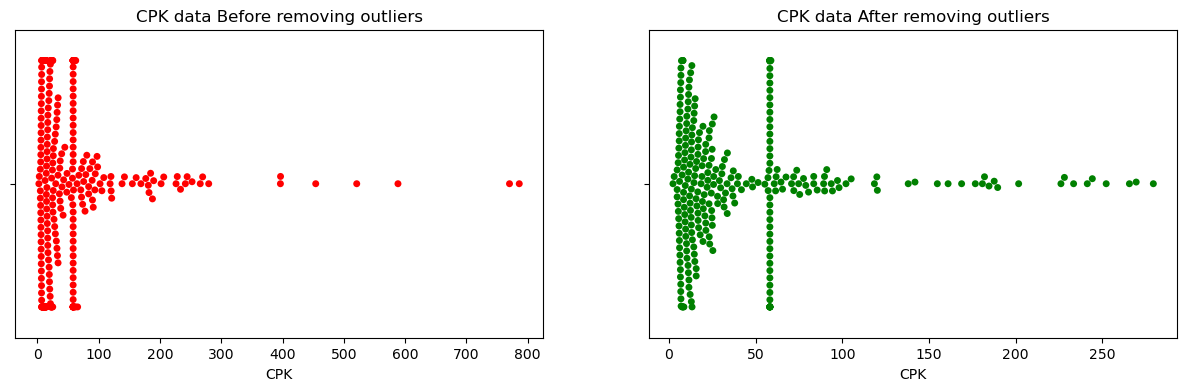

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.swarmplot(data=cvd, x='CPK',color="red", ax=axs[0]).set(title='CPK data Before removing outliers')
sns.swarmplot(data=cvd1, x='CPK',color="green", ax=axs[1]).set(title='CPK data After removing outliers')
plt.show()

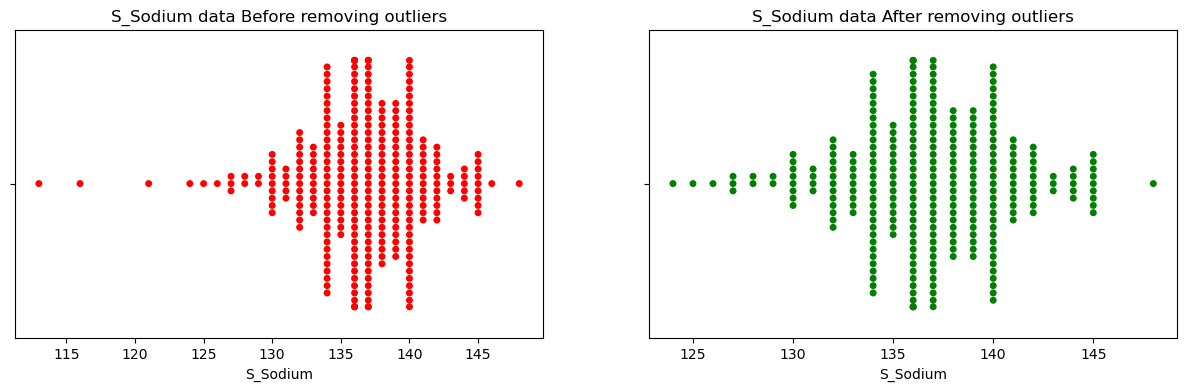

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.swarmplot(data=cvd, x='S_Sodium',color="red", ax=axs[0]).set(title='S_Sodium data Before removing outliers')
sns.swarmplot(data=cvd1, x='S_Sodium',color="green", ax=axs[1]).set(title='S_Sodium data After removing outliers')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.swarmplot(data=cvd, x='EF',color="red", ax=axs[0]).set(title='EF data Before removing outliers')
sns.swarmplot(data=cvd1, x='EF',color="green", ax=axs[1]).set(title='EF data After removing outliers')
plt.show()

<span style='color:red'>***Conclusion: - After removing outliers, it is clearly visible that the data quality is good***       
<span style='color:red'>-      CPK: Earlier CPK 0 - 800. After, outlier removal, it is having 0 to 260       
<span style='color:red'>-      S_Sodium: Earlier S_Sodium graph values are 110 - 150. After, outlier removal, it is 125 - 145   
<span style='color:red'>-      EF: Earlier EF graph was having from 20 to 80. After, outlier removal, it is having 20 to 60     

<span style='color:darkgreen'> ***In EDA process, we have converted "sex" variable to objects for better understanding for graphs. When we apply Machine learning, the ML models require all input and output variables to be numeric data. Hence, we convert the "sex" column back to "1" (Male) and "0" (Female) for further processing**   
<span style='color:darkgreen'>  - To achive this, we use pd.get_dummies() command

<span style='color:darkgreen'> ***In next steps, we need to make sure all the values are numericals as we need to implement ML model. Hence, in the 'sex' column, we can substitue "1" = Male and "0" = Female for further processing*********** 

In [ ]:
cvd1 = cvd1.replace({'sex': {'male': 1, 'female':0}})

In [ ]:
cvd1.head(5)

#   <span style='color:brown'> With all above steps, we completed Exploratory Data Analysis process.

# <span style='color:darkgreen'> 3. Train Test Split the data

In [ ]:
#for test and train split we need to import a library from sklearn

from sklearn.model_selection import train_test_split


<span style='color:darkgreen'>***Splitting data into Features and target***

In [ ]:
cvd1.head(2) 

<span style='color:darkgreen'>***In below step, we are going to segregate the dataset into input parameters & target dataset***   
    ***This means, X contains only input variable parameters, where as Y should contain only target variable***

In [ ]:
X = cvd1.drop(columns = 'target', axis = 1)
Y = cvd1['target']

In [ ]:
X.head(3) # This is dataset without target variable in this

In [ ]:
Y.head(2) # This is dataset only with target variable in this

<span style='color:darkgreen'>***Splitting data into Training data & testing data***
    
<span style='color:darkgreen'>    - below is the function to split data into Test & train  
<span style='color:darkgreen'>    - test_size = 0.2 indicates, we are dividing the data as 80% (training) and 20% (testing)  
<span style='color:darkgreen'>    - stratify = Y --- means, it will distribute equal data (1, 0), in the data sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 2)

In [ ]:
print (" ************ Training data SET **************** ")
print (X.shape, X_train.shape, X_test.shape)
print (Y.shape, Y_train.shape, Y_test.shape)



<span style='color:darkgreen'> ***In the above division - we can visualize below mentioned things.***      
<span style='color:darkgreen'> - Training dataset has 244 rows & 11 columns   
  <span style='color:darkgreen'> - Testing dataset has 56 rows & 11 columns  

In [ ]:
#Check the distribution of target variable in training data and test data after train-test-split 

print ("Distribution of target variable in training set")
print (Y_train.value_counts())

print ("Distribution of target variable in test set")
print (Y_test.value_counts())

<span style='color:darkgreen'> ***In the above results - we successfully divided the Test set & training set of data***   
<span style='color:darkgreen'> - In training data set, we have <span style='color:red'>155 patients without heart disease & 69 patients who have heart disease     
<span style='color:darkgreen'> - In test data set, we have <span style='color:red'>39 patients without heart disease & 17 patients who have heart disease 

# Model implementation



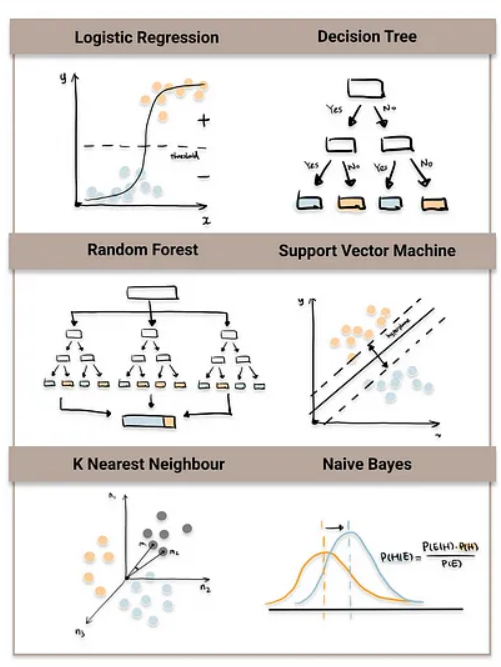





<span style='color:darkgreen'> ***1- Logistic Regression***   

In [ ]:
# import the Logistic regression model
from sklearn.linear_model import LogisticRegression

# import accuracy score & other things
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [ ]:
#defining Logistic regression
lr = LogisticRegression()

#In this step model is trained with training data on Logistic regression ML algorithm 
lr.fit(X_train, Y_train)

In [ ]:
y_pred1 = lr.predict(X_test)
accuracy_score(Y_test, y_pred1)

<span style='color:darkblue'> ***Logistic Regression - model evaluation - accuracy, classification, confusion matrix***

In [ ]:
#In our case, Y_test is the testing dataset & y_pred1 contains X_test dataset with model predictions.
#Hence, we need to check accuracy scores related to Y_test dataset vs X_test dataset with model predictions.

print(f"Accuracy Score: {accuracy_score(Y_test, y_pred1) * 100:.2f}%")
print(("_______________________________________________"))    
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(Y_test, y_pred1)}")
print("_______________________________________________")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(Y_test, y_pred1)}\n")


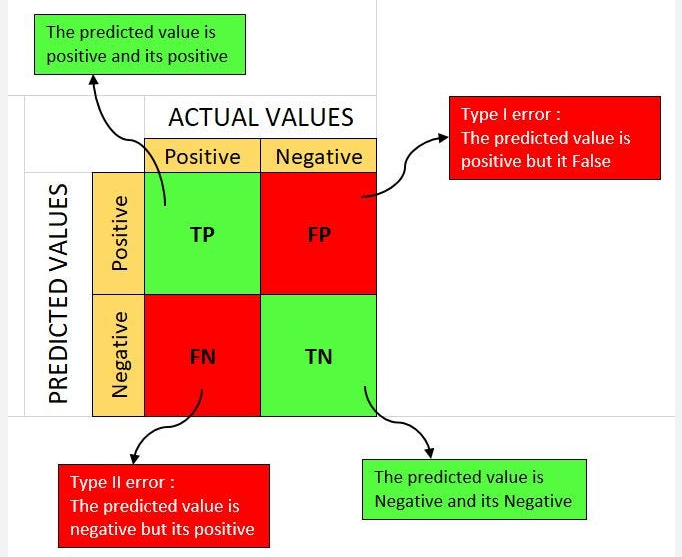





<span style='color:darkgreen'> *** //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////***   

<span style='color:darkgreen'> ***2- Decision tree***   

In [ ]:
# import the Logistic regression model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()


dt.fit(X_train, Y_train) #In this step model is trained with training data on Decisiontree ML algorithm 

In [ ]:
y_pred2 = dt.predict(X_test)
accuracy_score(Y_test, y_pred2)

<span style='color:orange'> ***Decision tree - model evaluation - accuracy, classification, confusion matrix***

In [ ]:
print(f"Accuracy Score: {accuracy_score(Y_test, y_pred2) * 100:.2f}%")
print(("_______________________________________________"))    
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(Y_test, y_pred2)}")
print("_______________________________________________")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(Y_test, y_pred2)}\n")

<span style='color:darkgreen'> *** ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////***  

<span style='color:darkgreen'> ***3- Random Forest classifier***   

In [ ]:
# import the Logistic regression model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


rf.fit(X_train, Y_train)  #In this step model is trained with training data on Random Forest ML algorithm 

In [ ]:
y_pred3 = rf.predict(X_test)
accuracy_score(Y_test, y_pred3)

<span style='color:green'> ***Random Forest - model evaluation - accuracy, classification, confusion matrix***

In [ ]:
print(f"Accuracy Score: {accuracy_score(Y_test, y_pred3) * 100:.2f}%")
print(("_______________________________________________"))    
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(Y_test, y_pred3)}")
print("_______________________________________________")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(Y_test, y_pred3)}\n")

<span style='color:darkgreen'> *** ///////////////////////////////////////////////--------------------------------------------------------------------------------------/////////////////////////////////////////////***   

<span style='color:darkgreen'> ***4- SVM (Support Vector Model)***   

In [ ]:
from sklearn import svm

svm = svm.SVC()

svm.fit(X_train, Y_train) #In this step model is trained with training data on SVM ML algorithm 

In [ ]:
y_pred4 = svm.predict(X_test)
accuracy_score(Y_test, y_pred4)

<span style='color:red'> ***SVM- model evaluation - accuracy, classification, confusion matrix***

In [ ]:
print(f"Accuracy Score: {accuracy_score(Y_test, y_pred4) * 100:.2f}%")
print(("_______________________________________________"))    
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(Y_test, y_pred4)}")
print("_______________________________________________")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(Y_test, y_pred4)}\n")

<span style='color:darkgreen'> *** ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////***   

<span style='color:darkgreen'> ***5- KNN (K Nearest Neighbour)***   

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, Y_train) #In this step model is trained with training data on KNN Neighbor algorithm 

In [ ]:
y_pred5 = knn.predict(X_test)
accuracy_score(Y_test, y_pred5)

<span style='color:blueviolet'> ***KNN model evaluation - accuracy, classification, confusion matrix***

In [ ]:
print(f"Accuracy Score: {accuracy_score(Y_test, y_pred5) * 100:.2f}%")
print(("_______________________________________________"))    
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(Y_test, y_pred5)}")
print("_______________________________________________")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(Y_test, y_pred5)}\n")

<span style='color:darkgreen'> *** ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////***   

<span style='color:darkgreen'> ***6- Naive Bayes***   

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()

nb.fit(X_train, Y_train) #In this step model is trained with training data on Gaissoam NB algorithm 

In [ ]:
y_pred6 = nb.predict(X_test)
accuracy_score(Y_test, y_pred6)

<span style='color:brown'> ***Naive Bayes evaluation - accuracy, classification, confusion matrix***

In [ ]:
print(("_______________________________________________"))
print(f"Accuracy Score: {accuracy_score(Y_test, y_pred6) * 100:.2f}%")
print(("_______________________________________________"))    
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(Y_test, y_pred6)}")
print("_______________________________________________")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(Y_test, y_pred6)}\n")

<span style='color:darkgreen'> *** ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////***   

<span style='color:darkgreen'> ***7 - Gradient Boosting Classifier***   

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, Y_train)  #In this step model is trained with training data on gradient boosting ML alogirithm

In [ ]:
y_pred7 = gbc.predict(X_test)
accuracy_score(Y_test, y_pred7)

<span style='color:red'> ***Gradient Booster evaluation - accuracy, classification, confusion matrix***

In [ ]:
print(("_______________________________________________"))
print(f"Accuracy Score: {accuracy_score(Y_test, y_pred7) * 100:.2f}%") 
print(("_______________________________________________"))    
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(Y_test, y_pred7)}")
print("_______________________________________________")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(Y_test, y_pred7)}\n")

<span style='color:darkgreen'> *** ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////***   

<span style='color:black'> ***Compare the accuracy of all the models***

In [ ]:
final_model = pd.DataFrame({'Models':['LR', 'DT', 'RF', 'SVM', 'KNN', 'NB', 'GBC'],
                           'ACC in %': [accuracy_score(Y_test, y_pred1)*100,
                                   accuracy_score(Y_test, y_pred2)*100,
                                   accuracy_score(Y_test, y_pred3)*100,
                                   accuracy_score(Y_test, y_pred4)*100,
                                   accuracy_score(Y_test, y_pred5)*100,
                                   accuracy_score(Y_test, y_pred6)*100,
                                   accuracy_score(Y_test, y_pred7)*100]})

#In above code, we are multiplying by 100 to make sure, we can see the accuracy in percentage

In [ ]:
final_model1 = final_model.round(2) #This is to limit deviding result to 2 decimal points
final_model1

In [ ]:
plt.figure(figsize=(6,3))
sns.barplot(final_model1['Models'], final_model1['ACC in %'])
plt.show()

<span style='color:black'> ***------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***   

<span style='color:black'> ***Train the data on entire dataset on Logistic regression model predicted highest accuracy for given  dataset<span style='color:red'>("80.36 % accuracy")***   

In [ ]:
# import the Logistic regression model as this is the one with highest accuracy score
from sklearn.linear_model import LogisticRegression

lr_full = LogisticRegression()
lr_full.fit(X,Y)    #X & Y are having full data without training and testing division

In [ ]:
#As a testing, here we can enter the data as we need to test the model
new_data = pd.DataFrame({
            'age': 50,
            'anaemia': 1,
            'cpk': 200,
            'diabetes': 0,
            'EF': 20,
            'High BP': 1,
            'platelets': 300000,
            'Scr': 0.5,
            'S_Sodium': 60,
            'Sex': 1,
            'smoking': 1,
}, index=[0])

In [ ]:
new_data #Above entered data is represented in row/colum

In [ ]:
#In case, the given input data (new_data) is giving the result of "1", this means patient is having having disease. Otherwise,
#with the given data, model will predict there is no heart disease

LR_Model_result = lr_full.predict(new_data)
if LR_Model_result[0] == 0:
    print("No Heart disease")
else:
    print("Patient has heart disease")